In [434]:
import regex as re
import pandas as pd

In [485]:

f=open('WhatsApp Chat with MME Unofficial 2024.txt','r',encoding='utf-8')
data =f.read()



In [436]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'


In [437]:
messages = re.split(pattern,data)[1:]


['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Abhijeet Nitrr created group "MME Unofficial \'24"\n',
 'Abhijeet Nitrr added you\n',
 "The message timer was updated. New messages will disappear from this chat 7 days after they're sent, except when kept\n",
 '~\u202fHarsh Ranjan Sinha changed the group description\n',
 '~\u202fHarsh Ranjan Sinha changed the group description\n',
 'You turned off disappearing messages.\n',
 "You updated the message timer. New messages will disappear from this chat 7 days after they're sent, except when kept.\n",
 'Venky Nit Rr turned off disappearing messages.\n',
 '+91 95171 50867: +😅\n',
 'Anurag Singh Thakur Executive E-Cell: 🥲🥲🥲\n',
 '+91 95072 12990: Sir se baat karo kab tk aayenge\n',
 '+91 82260 90633: cance\n',
 '+91 82260 90633: cancel*\n',
 '+91 93928 12725: Join us and be a part of this momentous occasion, as we invite you to *The Oath Taking C

In [438]:
 dates = re.findall(pattern, data)


['28/10/2021, 10:35 - ',
 '01/01/2021, 13:06 - ',
 '28/10/2021, 10:32 - ',
 '28/10/2021, 10:32 - ',
 '28/10/2021, 11:34 - ',
 '29/10/2021, 11:32 - ',
 '01/11/2021, 10:27 - ',
 '01/11/2021, 10:27 - ',
 '01/11/2021, 15:11 - ',
 '01/11/2021, 15:13 - ',
 '01/11/2021, 15:14 - ',
 '01/11/2021, 15:16 - ',
 '01/11/2021, 15:18 - ',
 '01/11/2021, 15:18 - ',
 '01/11/2021, 17:31 - ',
 '01/11/2021, 17:33 - ',
 '01/11/2021, 17:33 - ',
 '01/11/2021, 17:34 - ',
 '01/11/2021, 17:34 - ',
 '01/11/2021, 17:35 - ',
 '01/11/2021, 17:36 - ',
 '01/11/2021, 17:36 - ',
 '01/11/2021, 17:36 - ',
 '01/11/2021, 17:37 - ',
 '01/11/2021, 17:38 - ',
 '01/11/2021, 17:39 - ',
 '01/11/2021, 18:12 - ',
 '01/11/2021, 18:13 - ',
 '01/11/2021, 18:15 - ',
 '01/11/2021, 18:15 - ',
 '01/11/2021, 18:15 - ',
 '01/11/2021, 18:16 - ',
 '01/11/2021, 18:16 - ',
 '01/11/2021, 18:20 - ',
 '01/11/2021, 18:22 - ',
 '01/11/2021, 18:23 - ',
 '01/11/2021, 18:23 - ',
 '01/11/2021, 18:25 - ',
 '01/11/2021, 18:27 - ',
 '01/11/2021, 18:27 - ',


In [439]:
df = pd.DataFrame({'user_message': messages,'message_date': dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-10-28 10:35:00
1,"Abhijeet Nitrr created group ""MME Unofficial '...",2021-01-01 13:06:00
2,Abhijeet Nitrr added you\n,2021-10-28 10:32:00
3,The message timer was updated. New messages wi...,2021-10-28 10:32:00
4,~ Harsh Ranjan Sinha changed the group descrip...,2021-10-28 11:34:00


In [440]:
df.shape

(37039, 2)

In [441]:
users = []
messages = []
for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]))
        else:
            users.append('group_notification')
            messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,date,user,message
0,2021-10-28 10:35:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-01-01 13:06:00,group_notification,"Abhijeet Nitrr created group ""MME Unofficial '..."
2,2021-10-28 10:32:00,group_notification,Abhijeet Nitrr added you\n
3,2021-10-28 10:32:00,group_notification,The message timer was updated. New messages wi...
4,2021-10-28 11:34:00,group_notification,~ Harsh Ranjan Sinha changed the group descrip...


In [442]:
df['year'] = df['date'].dt.year
df.head()

,date,user,message,year
0,2021-10-28 10:35:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021
1,2021-01-01 13:06:00,group_notification,"Abhijeet Nitrr created group ""MME Unofficial '...",2021
2,2021-10-28 10:32:00,group_notification,Abhijeet Nitrr added you\n,2021
3,2021-10-28 10:32:00,group_notification,The message timer was updated. New messages wi...,2021
4,2021-10-28 11:34:00,group_notification,~ Harsh Ranjan Sinha changed the group descrip...,2021


In [443]:
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df.head()

,date,user,message,year,month_num,month
0,2021-10-28 10:35:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,10,October
1,2021-01-01 13:06:00,group_notification,"Abhijeet Nitrr created group ""MME Unofficial '...",2021,1,January
2,2021-10-28 10:32:00,group_notification,Abhijeet Nitrr added you\n,2021,10,October
3,2021-10-28 10:32:00,group_notification,The message timer was updated. New messages wi...,2021,10,October
4,2021-10-28 11:34:00,group_notification,~ Harsh Ranjan Sinha changed the group descrip...,2021,10,October


In [444]:
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df.head()

,date,user,message,year,month_num,month,day,day_name
0,2021-10-28 10:35:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,10,October,28,Thursday
1,2021-01-01 13:06:00,group_notification,"Abhijeet Nitrr created group ""MME Unofficial '...",2021,1,January,1,Friday
2,2021-10-28 10:32:00,group_notification,Abhijeet Nitrr added you\n,2021,10,October,28,Thursday
3,2021-10-28 10:32:00,group_notification,The message timer was updated. New messages wi...,2021,10,October,28,Thursday
4,2021-10-28 11:34:00,group_notification,~ Harsh Ranjan Sinha changed the group descrip...,2021,10,October,28,Thursday


In [445]:
df['hour'] = df['date'].dt.hour
df.head()

,date,user,message,year,month_num,month,day,day_name,hour
0,2021-10-28 10:35:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,10,October,28,Thursday,10
1,2021-01-01 13:06:00,group_notification,"Abhijeet Nitrr created group ""MME Unofficial '...",2021,1,January,1,Friday,13
2,2021-10-28 10:32:00,group_notification,Abhijeet Nitrr added you\n,2021,10,October,28,Thursday,10
3,2021-10-28 10:32:00,group_notification,The message timer was updated. New messages wi...,2021,10,October,28,Thursday,10
4,2021-10-28 11:34:00,group_notification,~ Harsh Ranjan Sinha changed the group descrip...,2021,10,October,28,Thursday,11


In [446]:
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,year,month_num,month,day,day_name,hour,minute
0,2021-10-28 10:35:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,10,October,28,Thursday,10,35
1,2021-01-01 13:06:00,group_notification,"Abhijeet Nitrr created group ""MME Unofficial '...",2021,1,January,1,Friday,13,6
2,2021-10-28 10:32:00,group_notification,Abhijeet Nitrr added you\n,2021,10,October,28,Thursday,10,32
3,2021-10-28 10:32:00,group_notification,The message timer was updated. New messages wi...,2021,10,October,28,Thursday,10,32
4,2021-10-28 11:34:00,group_notification,~ Harsh Ranjan Sinha changed the group descrip...,2021,10,October,28,Thursday,11,34


In [447]:
df.head()

,date,user,message,year,month_num,month,day,day_name,hour,minute
0,2021-10-28 10:35:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,10,October,28,Thursday,10,35
1,2021-01-01 13:06:00,group_notification,"Abhijeet Nitrr created group ""MME Unofficial '...",2021,1,January,1,Friday,13,6
2,2021-10-28 10:32:00,group_notification,Abhijeet Nitrr added you\n,2021,10,October,28,Thursday,10,32
3,2021-10-28 10:32:00,group_notification,The message timer was updated. New messages wi...,2021,10,October,28,Thursday,10,32
4,2021-10-28 11:34:00,group_notification,~ Harsh Ranjan Sinha changed the group descrip...,2021,10,October,28,Thursday,11,34


In [448]:
#CHATS DONE BY USERS
df[df['user']=='Deepak Panjwani']

,date,user,message,year,month_num,month,day,day_name,hour,minute
567,2021-11-02 14:01:00,Deepak Panjwani,+1\n,2021,11,November,2,Tuesday,14,1
1555,2021-11-08 14:55:00,Deepak Panjwani,Koi join hua kya ?\n,2021,11,November,8,Monday,14,55
1562,2021-11-08 14:59:00,Deepak Panjwani,Join karwao\n,2021,11,November,8,Monday,14,59
5627,2021-11-29 10:30:00,Deepak Panjwani,++\n,2021,11,November,29,Monday,10,30
7750,2021-12-16 21:21:00,Deepak Panjwani,🙋‍♂️\n,2021,12,December,16,Thursday,21,21
...,...,...,...,...,...,...,...,...,...,...
36247,2023-05-09 10:28:00,Deepak Panjwani,Happy birthday @918936841164 🥳🥳🥳\n,2023,5,May,9,Tuesday,10,28
36499,2023-06-11 10:11:00,Deepak Panjwani,Happy birthday @917426898945 bhai 🥳🥳🥳\n,2023,6,June,11,Sunday,10,11
36639,2023-06-24 10:34:00,Deepak Panjwani,Happy birthday @919507212990 bhai 🥳🥳🥳\n,2023,6,June,24,Saturday,10,34
36833,2023-07-10 09:11:00,Deepak Panjwani,Happy birthday @917000161452 bhai 🥳🥳🥳\n,2023,7,July,10,Monday,9,11


In [449]:
#TOTAL WORDS USED IN CHATS
words = []
for message in df['message']:
    words.extend(message.split())

In [450]:
len(words)

201366

In [451]:
#TOTAL MEDIA FILES SHARED 
df[df['message'] == '<Media omitted>\n'].shape

(4572, 10)

In [452]:
print(df)

                     date                user  \
0     2021-10-28 10:35:00  group_notification   
1     2021-01-01 13:06:00  group_notification   
2     2021-10-28 10:32:00  group_notification   
3     2021-10-28 10:32:00  group_notification   
4     2021-10-28 11:34:00  group_notification   
...                   ...                 ...   
37034 2023-07-19 22:40:00     +91 83053 20889   
37035 2023-07-19 22:40:00     +91 83053 20889   
37036 2023-07-19 22:45:00  Akshat Shrivastava   
37037 2023-07-19 22:46:00  Akshat Shrivastava   
37038 2023-07-19 23:27:00     +91 83053 20889   

                                                 message  year  month_num  \
0      Messages and calls are end-to-end encrypted. N...  2021         10   
1      Abhijeet Nitrr created group "MME Unofficial '...  2021          1   
2                             Abhijeet Nitrr added you\n  2021         10   
3      The message timer was updated. New messages wi...  2021         10   
4      ~ Harsh Ranjan Sinh

In [453]:
pip install urlextract


Note: you may need to restart the kernel to use updated packages.


In [454]:
#TOTAL NO. OF LINKS SHARED IN CHATS
from urlextract import URLExtract
extractor = URLExtract()
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [456]:
len(links)

612

In [457]:
#TOP USER (MOST BUSY USERS)
x= df['user'].value_counts().head()

In [458]:
import matplotlib.pyplot as plt

In [459]:
name = x.index
count = x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Abu Anas'),
  Text(1, 0, '+91 70245 51408'),
  Text(2, 0, 'Aryan Tiwari E-Cell HC'),
  Text(3, 0, '+91 80843 55488'),
  Text(4, 0, 'Abhijeet Nitrr')])

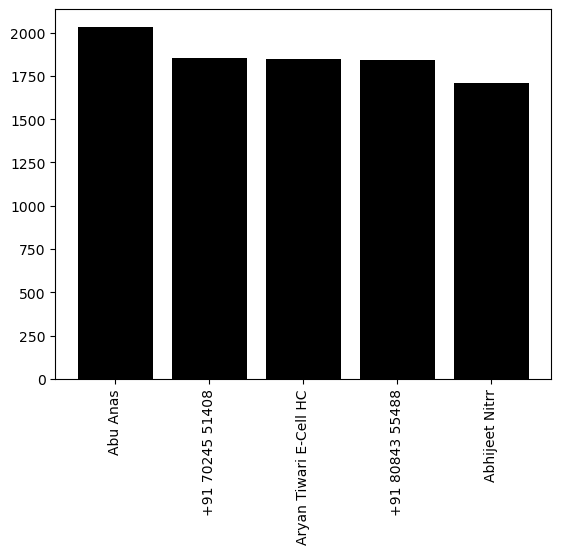

In [460]:
#BAR CHART FOR TOP 5 USERS
color ='black'
plt.bar(name,count,color=color)
plt.xticks(rotation='vertical')

In [461]:
#PERCENTAGE OF CHATS DONE BY EACH USER
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index()

,index,user
0,Abu Anas,5.49
1,+91 70245 51408,5.01
2,Aryan Tiwari E-Cell HC,4.99
3,+91 80843 55488,4.98
4,Abhijeet Nitrr,4.61
...,...,...
114,+91 6268 028 947,0.01
115,+91 91133 98980,0.01
116,+91 77239 90434,0.01
117,+91 88090 04853,0.01


In [462]:

df[df['user']!= 'group_notification']

,date,user,message,year,month_num,month,day,day_name,hour,minute
9,2021-11-01 15:13:00,+91 95171 50867,+😅\n,2021,11,November,1,Monday,15,13
10,2021-11-01 15:14:00,Anurag Singh Thakur Executive E-Cell,🥲🥲🥲\n,2021,11,November,1,Monday,15,14
11,2021-11-01 15:16:00,+91 95072 12990,Sir se baat karo kab tk aayenge\n,2021,11,November,1,Monday,15,16
12,2021-11-01 15:18:00,+91 82260 90633,cance\n,2021,11,November,1,Monday,15,18
13,2021-11-01 15:18:00,+91 82260 90633,cancel*\n,2021,11,November,1,Monday,15,18
...,...,...,...,...,...,...,...,...,...,...
37034,2023-07-19 22:40:00,+91 83053 20889,Mission Impossible dekhna chalne hai toh bol\n,2023,7,July,19,Wednesday,22,40
37035,2023-07-19 22:40:00,+91 83053 20889,<Media omitted>\n,2023,7,July,19,Wednesday,22,40
37036,2023-07-19 22:45:00,Akshat Shrivastava,Let him cook\n,2023,7,July,19,Wednesday,22,45
37037,2023-07-19 22:46:00,Akshat Shrivastava,Saturday ko 3no chalte hai 💀☠️\n,2023,7,July,19,Wednesday,22,46


In [463]:
#MOST COMMON WORDS USED IN CHATS
#AS THERE WORDS FROM GROUP NOTIFICATION AND MEDIA SO WE WILL REMOVE THAT MESSAGES
temp= df[df['user'] !='group_notification']
temp= temp[temp['message'] != '<Media omitted>\n']

In [464]:
words= []
for message in temp['message']:
    words.extend(message.split())

In [465]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,Happy,6653
1,Birthday,3694
2,birthday,2898
3,to,2235
4,hai,2089
5,This,1813
6,was,1803
7,message,1796
8,deleted,1752
9,the,1654


In [466]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [467]:

pip install emoji==1.7

Note: you may need to restart the kernel to use updated packages.


In [468]:
#MOST COMMON EMOJIS USED IN CHAT
import emoji

In [469]:
emojis =[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])


In [470]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🥳,9470
1,🎉,3593
2,🎂,3519
3,😂,3004
4,🙂,1689
...,...,...
517,🛞,1
518,🛝,1
519,🏸,1
520,🚴,1


In [471]:
df['month_num']=df['date'].dt.month

In [472]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [473]:
timeline

,year,month_num,month,message
0,2021,1,January,1
1,2021,10,October,5
2,2021,11,November,5825
3,2021,12,December,4702
4,2022,1,January,6155
5,2022,2,February,2639
6,2022,3,March,5023
7,2022,4,April,1314
8,2022,5,May,1131
9,2022,6,June,673


In [474]:
#TIMELINE(MONTH-WISE)
time =[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [475]:
timeline['time']=time

In [476]:
timeline

,year,month_num,month,message,time
0,2021,1,January,1,January-2021
1,2021,10,October,5,October-2021
2,2021,11,November,5825,November-2021
3,2021,12,December,4702,December-2021
4,2022,1,January,6155,January-2022
5,2022,2,February,2639,February-2022
6,2022,3,March,5023,March-2022
7,2022,4,April,1314,April-2022
8,2022,5,May,1131,May-2022
9,2022,6,June,673,June-2022


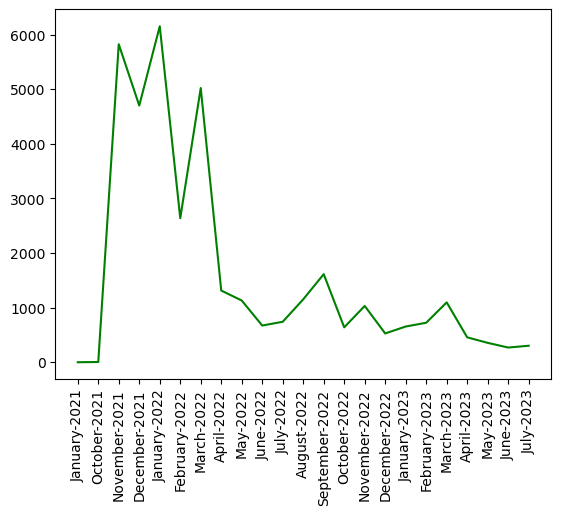

In [477]:
color = 'green'
plt.plot(timeline['time'],timeline['message'],color=color)
plt.xticks(rotation='vertical')
plt.show()

In [478]:
#HOURLY TIMELINE
df['only_date']=df['date'].dt.date

In [479]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

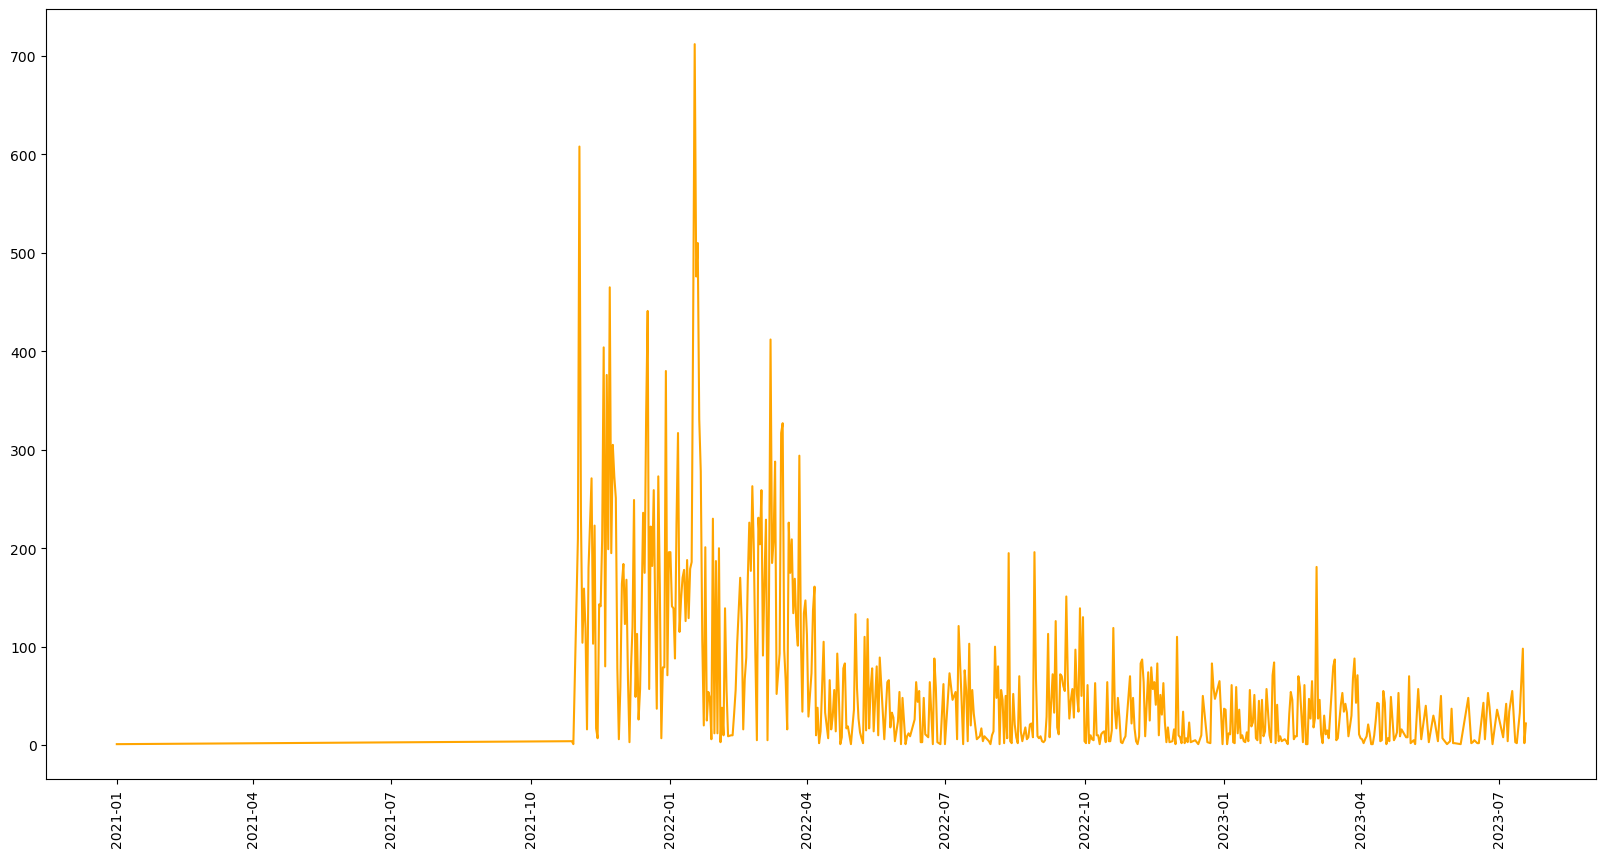

In [480]:
color = 'orange'
plt.figure(figsize=(20,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'],color=color)
plt.xticks(rotation='vertical')
plt.show()

In [481]:
# MOST BUSY DAY
df['day_name'] = df['date'].dt.day_name()

In [482]:
busy_day=df['day_name'].value_counts()

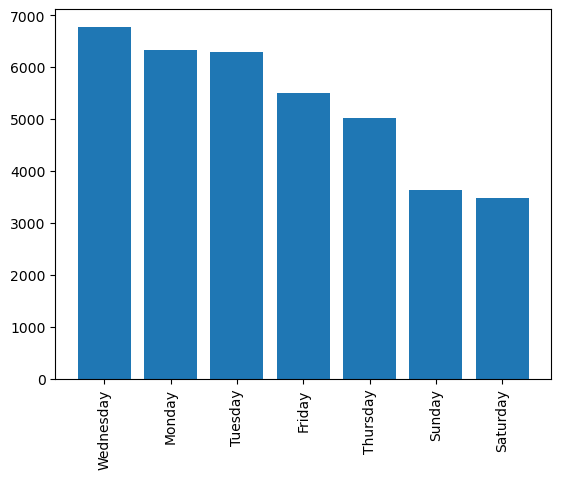

In [483]:
plt.bar(busy_day.index,busy_day.values)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# BUSY MONTH
busy_month=df['month'].value_counts()

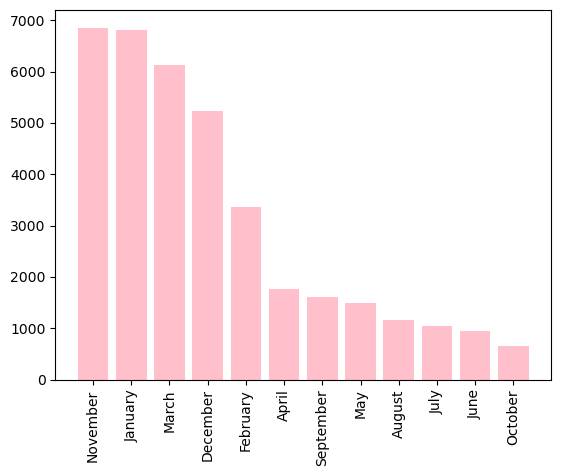

In [484]:
color = 'pink'
plt.bar(busy_month.index,busy_month.values,color=color)
plt.xticks(rotation='vertical')
plt.show()